In [3]:
import pandas as pd
from math import e
ori_data = pd.read_table("延页2井标准.txt", sep="\s+", skiprows=6)

test = ori_data[(ori_data["AC"] > 50)
                    & (ori_data["AC"] < 500)
                    & (ori_data["DEN"] > 1)
                    & (ori_data["DEN"] < 5)].reset_index(drop=True)

depth = test['#DEPTH']
tp = test['AC']
den = test['DEN']

ts = tp / (1 - 1.15 * (((1 / den) + (1 / den) ** 3) / (e ** (1 / den)))) ** 1.5
y_mod = (den / ts ** 2) * ((3 * ts ** 2 - 4 * tp ** 2) / (ts ** 2 - tp ** 2)) * 10 ** 6
p_ratio = (ts ** 2 - 2 * tp ** 2) / (2 * (ts ** 2 - tp ** 2))

dep_den = test[["#DEPTH", "DEN"]]
delta_depth = dep_den.iloc[100,0] - dep_den.iloc[99,0]
list1 = dep_den["DEN"].tolist()# 将密度转化成数组，方便计算
delta_den = [] # 为离散化的ρ值
for i in range(len(list1)):
    if(i == 0):
        delta_den.append(list1[i]) # 第一个密度值前无其他值，故不需要迭代
    elif(i > 0):
        delta_den.append(delta_den[i-1] + list1[i])

ver_p = [(x * delta_depth + 120 * 1) * 9.8 / 1000 for x in delta_den] # 前面的
result = pd.DataFrame(list(zip(depth, y_mod, p_ratio, ver_p)),
                              columns=["深度", "杨氏模量", "泊松比", "垂向地应力"]).round(3)

Biot, Pp, H_xishu, h_xishu, cor_density= 0.5, 1, 0.000567078, -1.67078e-005, 2

result["水平最小地应力"] = Biot*Pp*depth/100 + p_ratio / (1-p_ratio) * (ver_p - Biot*Pp*depth/100)\
    + y_mod * h_xishu / (1 - p_ratio**2) + p_ratio * y_mod * H_xishu/(1-p_ratio**2)

result["水平最大地应力"] = Biot*Pp*depth/100 + p_ratio / (1-p_ratio) * (ver_p - Biot*Pp*depth/100)\
    + y_mod * H_xishu / (1 - p_ratio**2) + p_ratio * y_mod * h_xishu/(1-p_ratio**2)

result["垂向应力差"] = abs(ver_p-result["水平最小地应力"])
result["水平应力差"] = abs(result["水平最大地应力"]-result["水平最小地应力"])

result


D:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,深度,杨氏模量,泊松比,垂向地应力,水平最小地应力,水平最大地应力,垂向应力差,水平应力差
0,119.950,0.896,0.495,1.177,1.166827,1.167177,0.010486,0.000350
1,120.075,17.706,0.430,1.179,1.042552,1.049779,0.136853,0.007227
2,120.200,21.022,0.418,1.182,1.023898,1.032551,0.157712,0.008654
3,120.325,20.836,0.418,1.184,1.025608,1.034185,0.158205,0.008577
4,120.450,20.736,0.418,1.186,1.027341,1.035877,0.158676,0.008536
...,...,...,...,...,...,...,...,...
20669,2703.825,45.008,0.387,65.308,46.171022,46.189971,19.137049,0.018949
20670,2703.950,54.756,0.384,65.311,45.811292,45.834389,19.499288,0.023097
20671,2704.075,55.460,0.383,65.313,45.622708,45.646126,19.690393,0.023418
20672,2704.200,33.337,0.425,65.315,51.787163,51.800822,13.528081,0.013659


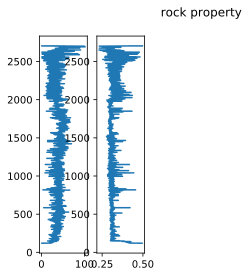

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"]='Simei'
plt.rcParams["axes.unicode_minus"]=False
%config InlineBackend.figure_format = 'svg'

plt.suptitle("rock property")

plt.subplot(1,6,1)
plt.plot(result["杨氏模量"], result["深度"])
plt.subplot(1,6,2)
plt.plot(result["泊松比"], result["深度"])